In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')
# plt.rcParams['figure.dpi'] = 300


# Density physics

The most physically realistic physics are density-based physics. Here we will code up a class that plots the supply and demand curves, and calcualtes the equilibrium. To learn more about classes check out [this lecture](https://python-programming.quantecon.org/python_oop.html) at QuantEcon.

In [26]:
from collections import namedtuple
Equilibrium = namedtuple('Equilibrium',['k','t','q'])
k0 = 5
class TrafficProblem():
    def __init__(self, L = 3, a = 1.2, βt = .17, α=4., k0=7):
        self.k0 = k0
        self.L = L
        self.βt = βt
        self.α=α
        self.a = a
    
    def v(self,k):
        return self.a*np.exp(-(k/self.k0)**3)
    def Q(self,k):
        return self.v(k)*k
    def t(self,k):
        return self.L/self.v(k)
    def Td(self,q):
        return (self.α -q)/self.βt

    def findEquilibrium(self,guess=4.):
        f = lambda k: self.Td(self.Q(k))-self.t(k)
        k_eq = opt.root(f,x0=guess).x[0]
        t_eq = self.t(k_eq)
        q_eq = self.Q(k_eq)
        return Equilibrium(k_eq,t_eq,q_eq)
    
    def drawPlot(self,ylim=6,figsize=(4,3)): #you can pass whatever attributes you want here, such as the figure size
        fig,ax = plt.subplots(figsize=figsize)
        ks = np.linspace(0,20,100)
        qs = self.Q(ks)
        ax.plot(qs,self.t(ks)) #supply plot T^s
        ax.plot(qs,self.Td(qs)) #demand
        ax.set_ylim(0,ylim)
        ax.set_xlim(0,ax.get_xlim()[1])
        ax.set_xlabel('q')
        ax.set_ylabel('t')
        


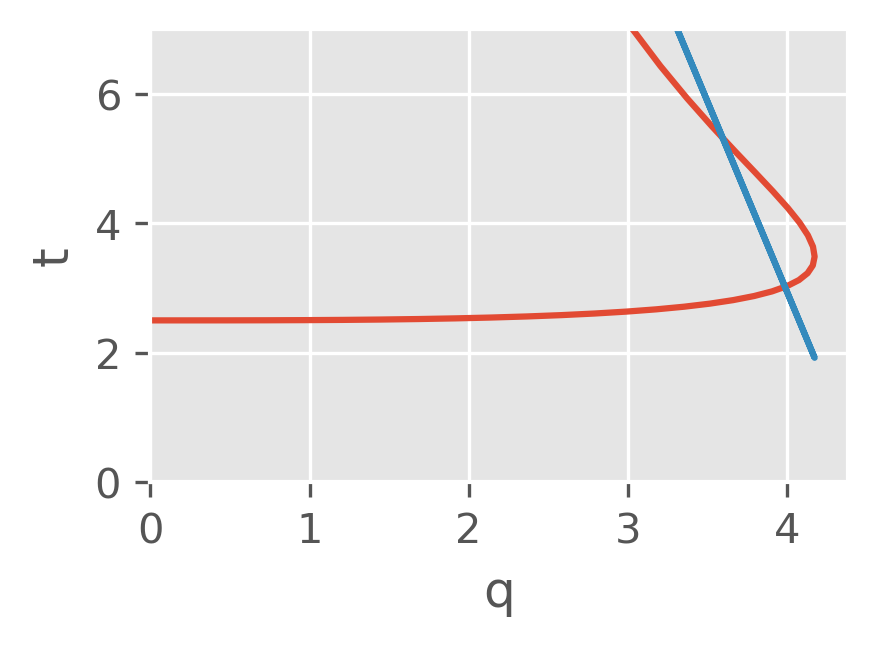

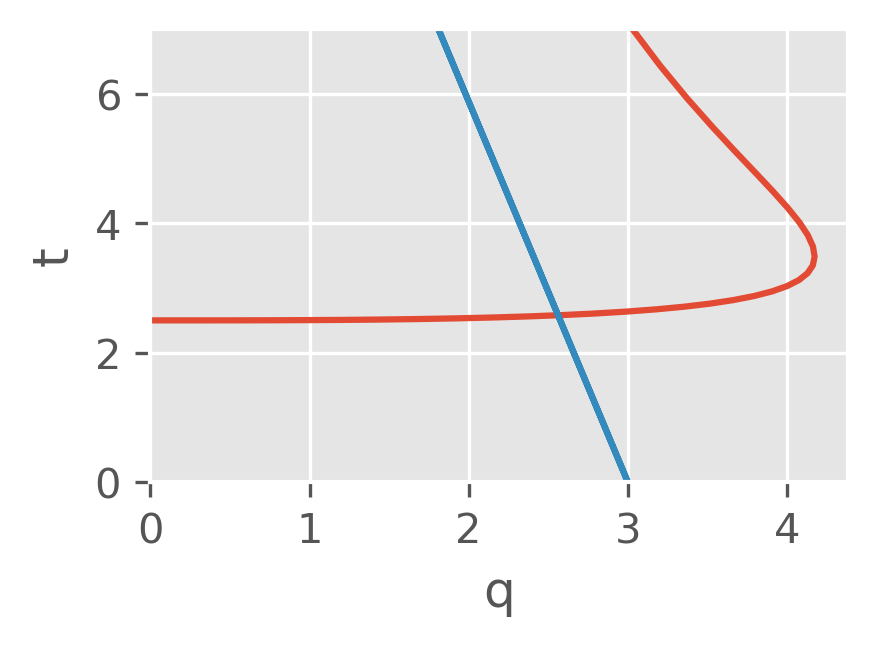

In [28]:
#here's an example. we plot  
TP = TrafficProblem(α=4.5)
TP.drawPlot(ylim=7,figsize=(3,2)) #say we want to see up to t = 7
TP2 = TrafficProblem(α=3)
TP2.drawPlot(ylim=7,figsize=(3,2)) #say we want to see up to t = 7
# eq = TP.findEquilibrium(guess=6)
# eq
# eq.q
# eq = {'k':5,'t':3}
# eq['k']
# eq
# it looks like this guess was about right because the result is where the lines intersect at about (q=4,t=3)

# Flow physics

 active_mask: array([0, 0])
        cost: 1.6252973361913694e-09
         fun: array([ 1.19668364e-09, -5.70139866e-05])
        grad: array([-2.96538904e-04, -5.71700677e-10])
         jac: array([[-3.20633948e+00, -9.99999989e-01],
       [ 5.20109335e+00, -1.09619233e-05]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 21
        njev: 21
  optimality: 3.2506367315656254e-09
      status: 1
     success: True
           x: array([3.99998904, 5.20109335])

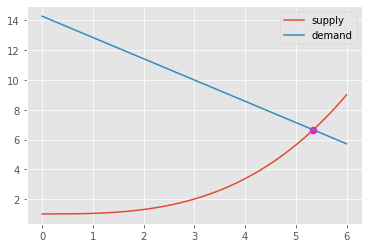

In [26]:
α=10
βm = 2
βt = .7
γ = 3.
tf = 1.
q0 = 4.

Qd = lambda t,m: α - βt*t - βm*m
Td = lambda q,m: (α - βm*m - q)/βt
Ts = lambda q: tf*(1+(q/γ)**3)

fig,ax = plt.subplots()
qs = np.linspace(0,6,50)
ax.plot(qs,Ts(qs),label='supply')
ax.plot(qs,Td(qs,0),label='demand')
ax.legend()

f = lambda q: Td(q,0)- Ts(q)

from collections import namedtuple
Equilibrium = namedtuple('Equilibrium',['q','t'])


q_eq = opt.root(f,x0=5).x[0]
t_eq = Ts(q_eq)
eq = Equilibrium(q_eq,t_eq)
ax.scatter([eq.q],[eq.t],color='magenta',s=50)

f = lambda q,tq: np.array([
    Td(q,0) - (Ts(q) + tq), 
    (q-q0)*tq
    ])

opt.least_squares(lambda x: f(x[0],x[1]),x0=(0,20), bounds=((0,0),(q0,np.inf)))
